In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### TMDB_MOVIES
We will carry out data understanding on the tmdb movies data and come up with suitable analyses and insights that fulfil our objectives

In [2]:
#load the tmdb movies dataset
tmdb_movies = pd.read_csv("tmdb.movies.csv.gz")
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
#Dropping the first column by slicing because it's not necessary
tmdb_movies = tmdb_movies.iloc[:, 1:]
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
#Getting overall information of the tmdb data
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [5]:
#checking for null values
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [6]:
#checking for duplicates in the whole dataset
tmdb_movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [7]:
#check the summary statistics of the numerical data
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [8]:
#check for unique values in the categorical data 
print(tmdb_movies["title"].nunique())
print(tmdb_movies["original_language"].nunique())

24688
76


From the above exploration the columns that are relevant to our analyses are the popularity, vote average, vote count, and title columns.
We will draw insights on:
1. Which film is the most popular
2. Which genre of films have the highest revenue returns

In [9]:
#check the most popular film based on vote counts
tmdb_movies = tmdb_movies.sort_values("vote_count",ascending=False)
tmdb_movies.head()
#most popular film is called Inception

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597


In [10]:
#check the most popular film based on vote average
tmdb_movies = tmdb_movies.sort_values("vote_average",ascending=False)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
16566,"[35, 18]",340895,en,The Idiot Faces Tomorrow,0.6,2015-05-19,The Idiot Faces Tomorrow,10.0,1
4451,[],310335,en,Torchlighters: The William Booth Story,0.6,2011-10-27,Torchlighters: The William Booth Story,10.0,1
4468,[],135101,en,My Last Day,0.6,2011-04-21,My Last Day,10.0,1
4467,[],136310,en,Explosions in the Sky - Barcelona Theatre,0.6,2011-06-06,Explosions in the Sky - Barcelona Theatre,10.0,1
4466,[10402],139970,da,Counting Crows: August & Everything after,0.6,2011-08-29,Counting Crows: August & Everything after,10.0,1


In [11]:
#check the most popular film based on popularity
tmdb_movies = tmdb_movies.sort_values("popularity",ascending=False)
tmdb_movies.head()
#most popular film is called Avengers: Infinity War

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In order to analyse the cost of production and how much revenue is earned,for  the most popular films we will have to explore the datasets with information on budgets. That is the tn_movies_budgets dataset and bom_movies dataset

In [12]:
#load the tn_movies dataset
tn_movies = pd.read_csv("tn.movie_budgets.csv.gz")
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#check overall info
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
#check for null values
tn_movies.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
#check for duplicates
tn_movies.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [16]:
#load the box office movies dataset
box_office = pd.read_csv("bom.movie_gross.csv.gz")
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
#check the general information
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
#check for null values
box_office.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
#check for duplicates
box_office.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

From the above information of the two datasets for us to calculate the revenue, we will use the tn_movies dataset since it contains information on production budget and the worldwide gross.

To get the production budget and revenue for each film, we will merge the two datasets

In [20]:
#The common column between the two dataframes are movie and title
#To avoid case sensitivity issues when merging the values we will convert the title and movie columns to lowercase

tn_movies['movie']=tn_movies['movie'].str.lower()
tmdb_movies['title']=tmdb_movies['title'].str.lower()

In [21]:
#merging both dataframes
tmdb_tn_movies = pd.merge(tmdb_movies,tn_movies,left_on='title',right_on='movie',how='inner')
tmdb_tn_movies

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,avengers: infinity war,8.3,13948,7,"Apr 27, 2018",avengers: infinity war,"$300,000,000","$678,815,482","$2,048,134,200"
1,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,john wick,7.2,10081,6,"Oct 24, 2014",john wick,"$30,000,000","$43,037,835","$76,235,001"
2,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,the hobbit: the battle of the five armies,7.3,8392,22,"Dec 17, 2014",the hobbit: the battle of the five armies,"$250,000,000","$255,119,788","$945,577,621"
3,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,27,"May 4, 2012",the avengers,"$225,000,000","$623,279,547","$1,517,935,897"
4,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,35,"Aug 14, 1998",the avengers,"$60,000,000","$23,385,416","$48,585,416"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,[],371179,en,For Your Consideration,0.600,2013-01-28,for your consideration,6.0,1,15,"Nov 17, 2006",for your consideration,"$12,000,000","$5,549,923","$5,549,923"
2442,[18],232036,en,The Pledge,0.600,2011-08-01,the pledge,6.0,1,7,"Jan 19, 2001",the pledge,"$45,000,000","$19,719,930","$29,406,132"
2443,[27],310933,en,Bleeding Hearts,0.600,2013-06-01,bleeding hearts,6.0,2,87,"Feb 3, 2015",bleeding hearts,"$1,200,000",$0,$0
2444,[18],409540,en,Happy 40th,0.600,2015-05-29,happy 40th,6.0,2,36,"Dec 31, 2014",happy 40th,"$35,000",$0,$0


The production-budget column and worldwide_gross columns' datatype is a string. This is because of the presence of the currency symbols and commas. We will have to do away with the currency sign and commas in order to carry out mathematical operations on the columns as integers

In [22]:
#removing the currency sign and commas
tmdb_tn_movies['production_budget'] =tmdb_tn_movies['production_budget'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

tmdb_tn_movies['worldwide_gross']=tmdb_tn_movies['worldwide_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

tmdb_tn_movies.head()

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,avengers: infinity war,8.3,13948,7,"Apr 27, 2018",avengers: infinity war,300000000.0,"$678,815,482",2.048134e+09
1,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,john wick,7.2,10081,6,"Oct 24, 2014",john wick,30000000.0,"$43,037,835",7.623500e+07
2,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,the hobbit: the battle of the five armies,7.3,8392,22,"Dec 17, 2014",the hobbit: the battle of the five armies,250000000.0,"$255,119,788",9.455776e+08
3,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,27,"May 4, 2012",the avengers,225000000.0,"$623,279,547",1.517936e+09
4,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,35,"Aug 14, 1998",the avengers,60000000.0,"$23,385,416",4.858542e+07


In [23]:
#calculating the revenue of each movie
tmdb_tn_movies['revenue'] = tmdb_tn_movies['worldwide_gross'] - tmdb_tn_movies['production_budget']

tmdb_tn_movies.head()

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,avengers: infinity war,8.3,13948,7,"Apr 27, 2018",avengers: infinity war,300000000.0,"$678,815,482",2.048134e+09,1.748134e+09
1,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,john wick,7.2,10081,6,"Oct 24, 2014",john wick,30000000.0,"$43,037,835",7.623500e+07,4.623500e+07
2,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,the hobbit: the battle of the five armies,7.3,8392,22,"Dec 17, 2014",the hobbit: the battle of the five armies,250000000.0,"$255,119,788",9.455776e+08,6.955776e+08
3,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,27,"May 4, 2012",the avengers,225000000.0,"$623,279,547",1.517936e+09,1.292936e+09
4,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,the avengers,7.6,19673,35,"Aug 14, 1998",the avengers,60000000.0,"$23,385,416",4.858542e+07,-1.141458e+07


### Visualising Results

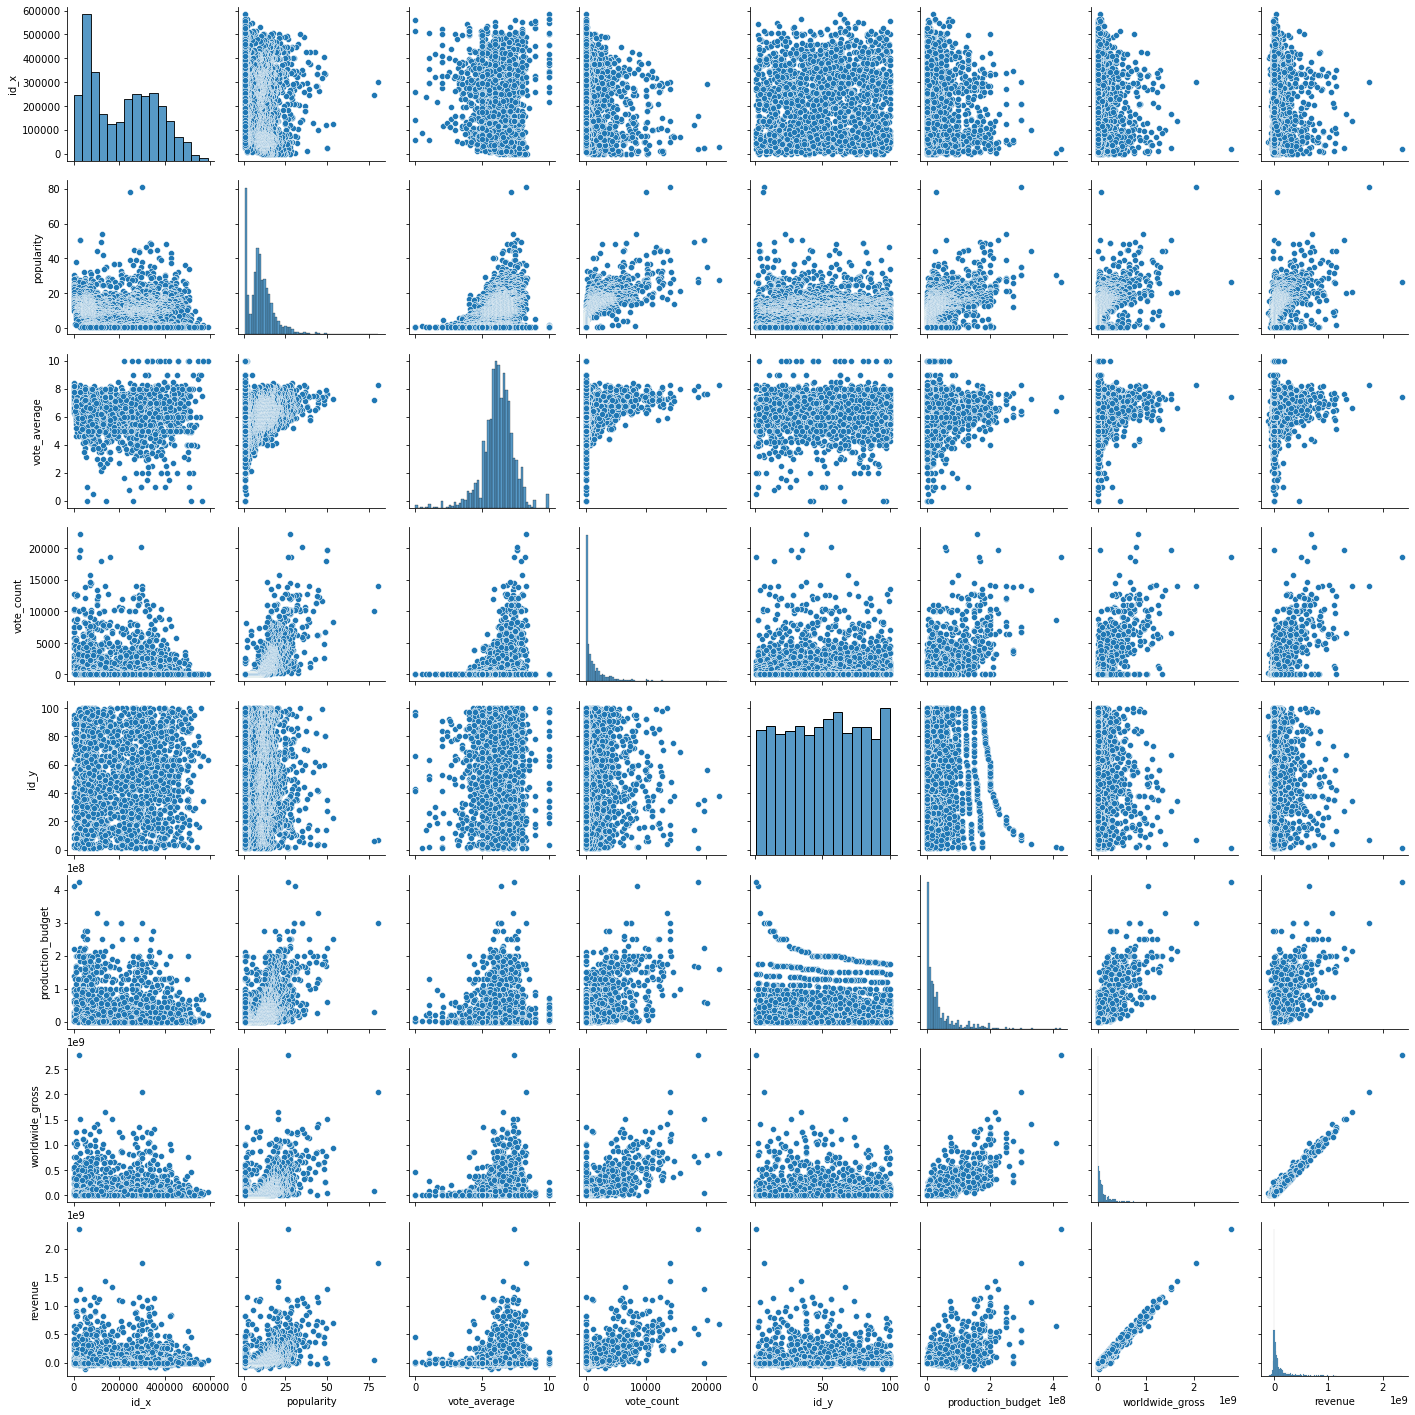

In [24]:
#Let's do a pairplot to see the relationship between the columns in our dataframe

sns.pairplot(tmdb_tn_movies)
plt.show()

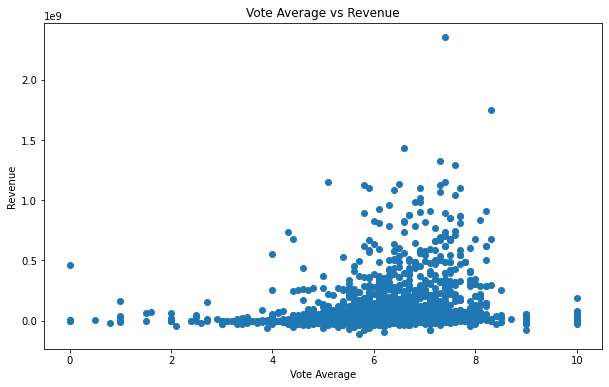

In [25]:
#Vote average vs revenue
plt.figure(figsize=(10,6))
plt.scatter(tmdb_tn_movies['vote_average'],tmdb_tn_movies['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.title('Vote Average vs Revenue')
plt.show()

The relationship between the vote average and revenue is weak. Therefore, the amount of revenue generated by a film does not depend on the number of votes it gets. 

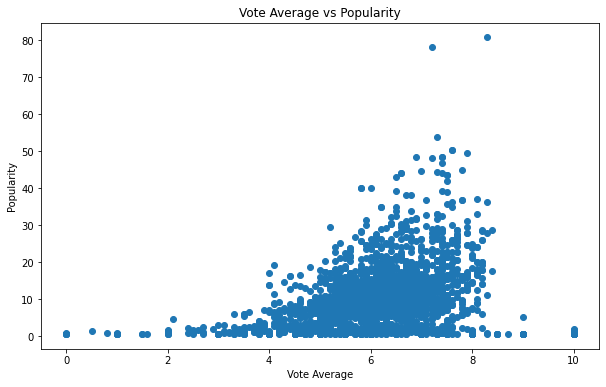

In [28]:
#vote average vs popularity
plt.figure(figsize=(10,6))
plt.scatter(tmdb_tn_movies['vote_average'],tmdb_tn_movies['popularity'])
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Vote Average vs Popularity')
plt.show()

There is a positive correlation between votes and popularity. The number of votes a film gets, determines its popularity.

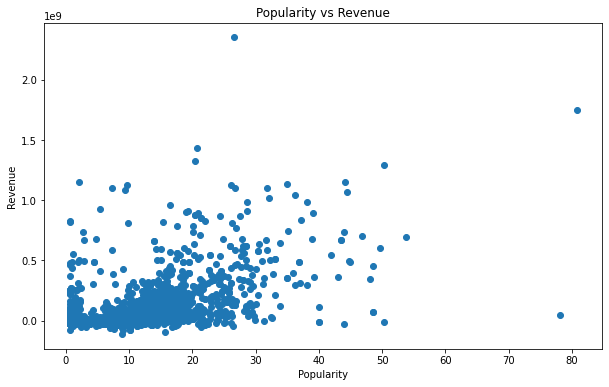

In [29]:
#popularity vs revenue
plt.figure(figsize=(10,6))
plt.scatter(tmdb_tn_movies['popularity'],tmdb_tn_movies['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')
plt.show()

The relationship between popularity and revenue is weak. The popularity of a film does not determine how much revenue it will receive.